In [2]:
import os
import sys

In [3]:
sys.path.append(os.path.abspath("../.."))

In [4]:
from analysis.preprocessing import load_and_clean_red_list_index_data

In [5]:
df = load_and_clean_red_list_index_data()
df

,Entity,Code,Year,_15_5_1__er_rsk_lst
0,Afghanistan,AFG,1993,0.93
1,Afghanistan,AFG,1994,0.93
2,Afghanistan,AFG,1995,0.93
3,Afghanistan,AFG,1996,0.93
4,Afghanistan,AFG,1997,0.93
...,...,...,...,...
8315,Zimbabwe,ZWE,2020,0.79
8316,Zimbabwe,ZWE,2021,0.79
8317,Zimbabwe,ZWE,2022,0.79
8318,Zimbabwe,ZWE,2023,0.79


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configuration générale des graphiques
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")

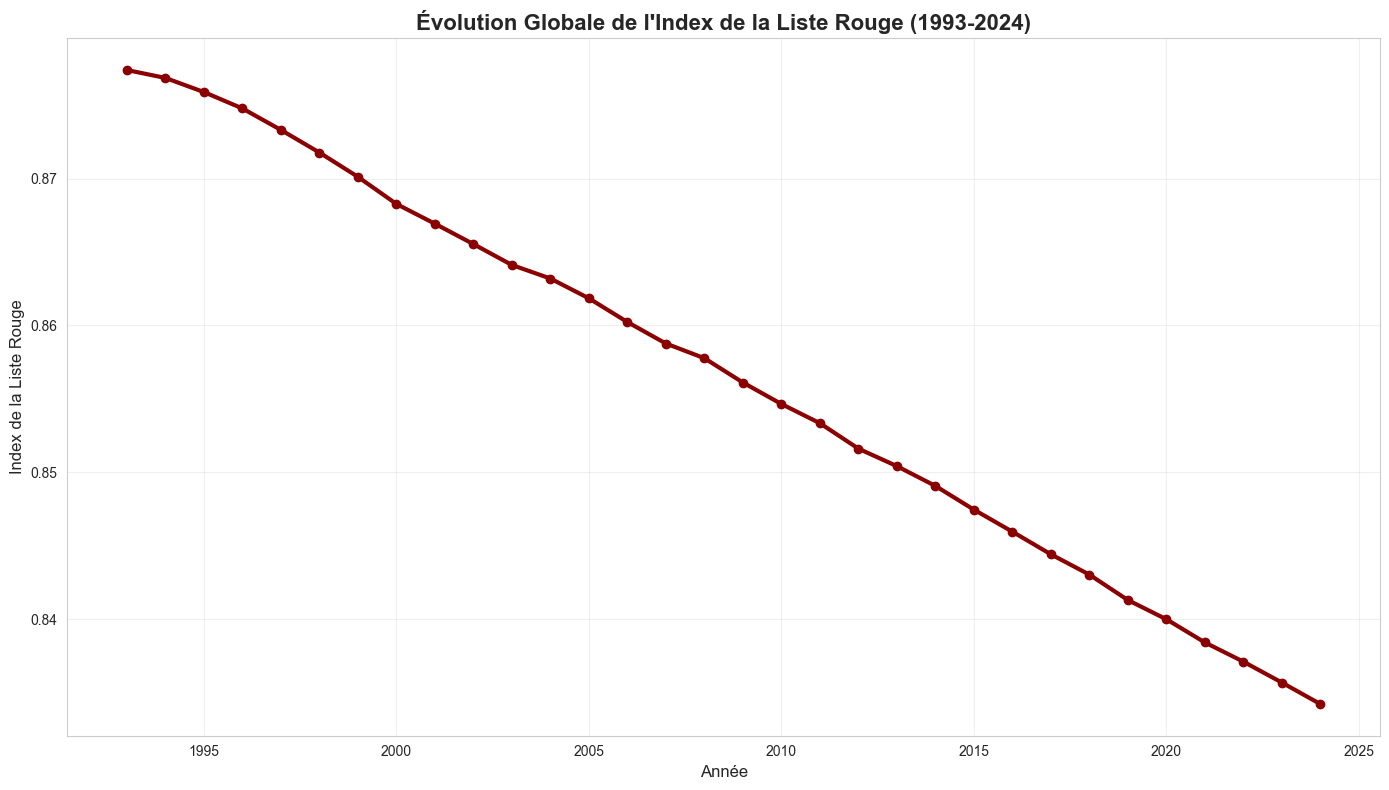

In [7]:
# 1. Évolution temporelle globale de l'index de la liste rouge
plt.figure(figsize=(14, 8))

# Calcul de la moyenne mondiale par année
yearly_global = df.groupby('Year')['_15_5_1__er_rsk_lst'].mean().reset_index()

plt.plot(yearly_global['Year'], yearly_global['_15_5_1__er_rsk_lst'],
         marker='o', linewidth=3, markersize=6, color='darkred')
plt.title('Évolution Globale de l\'Index de la Liste Rouge (1993-2024)',
          fontsize=16, fontweight='bold')
plt.xlabel('Année', fontsize=12)
plt.ylabel('Index de la Liste Rouge', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

C:\Users\julie\AppData\Local\Temp\ipykernel_4880\521086908.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_copy, x='Decade', y='_15_5_1__er_rsk_lst', palette='viridis')


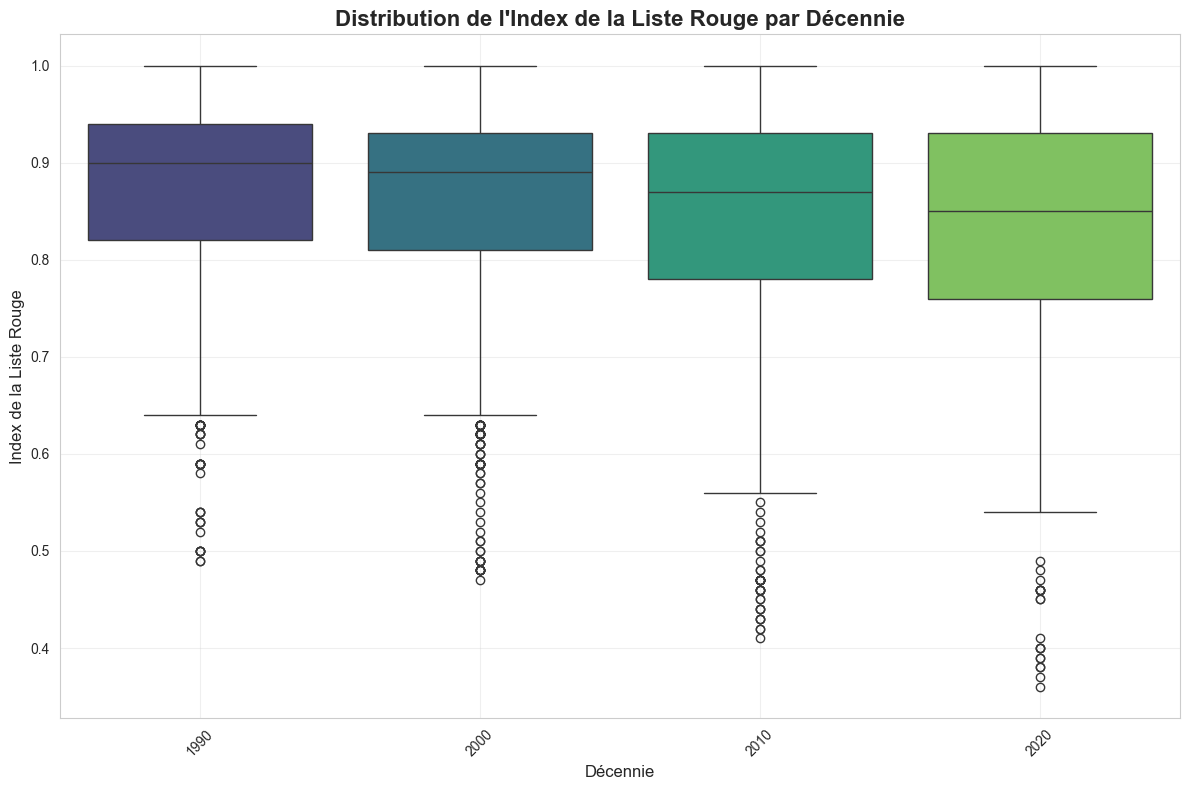

In [8]:
# 6. Boxplot : distribution par décennie
df_copy = df.copy()
df_copy['Decade'] = (df_copy['Year'] // 10) * 10

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_copy, x='Decade', y='_15_5_1__er_rsk_lst', palette='viridis')
plt.title('Distribution de l\'Index de la Liste Rouge par Décennie',
          fontsize=16, fontweight='bold')
plt.xlabel('Décennie', fontsize=12)
plt.ylabel('Index de la Liste Rouge', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

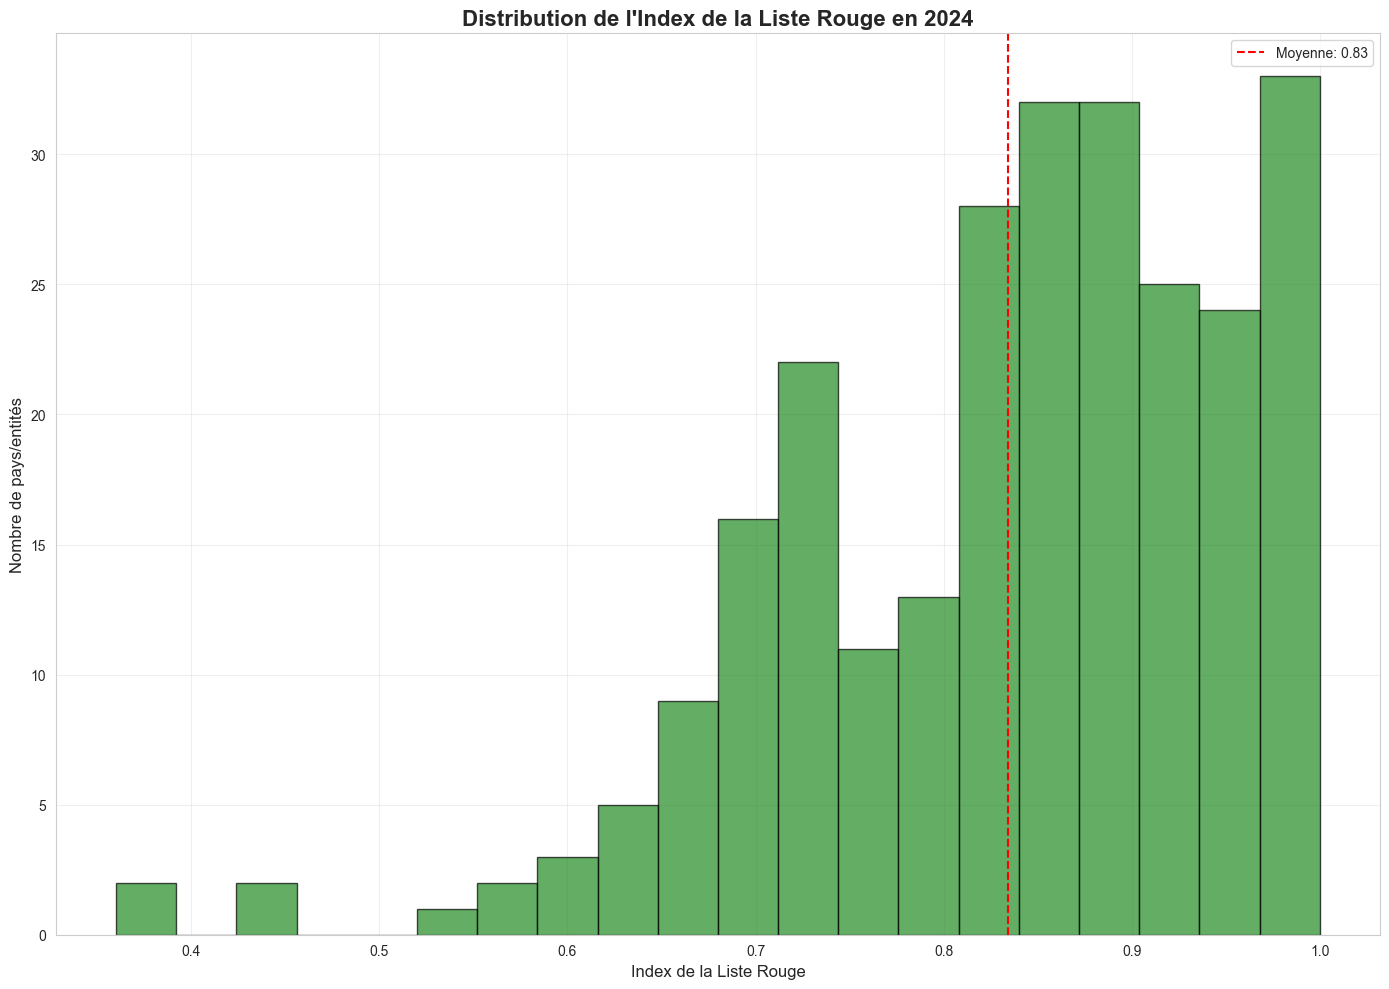

In [9]:
# 2. Distribution de l'index par région/pays (données récentes)
latest_year = df['Year'].max()
latest_data = df[df['Year'] == latest_year].copy()

plt.figure(figsize=(14, 10))
plt.hist(latest_data['_15_5_1__er_rsk_lst'], bins=20, alpha=0.7, color='forestgreen', edgecolor='black')
plt.title(f'Distribution de l\'Index de la Liste Rouge en {latest_year}',
          fontsize=16, fontweight='bold')
plt.xlabel('Index de la Liste Rouge', fontsize=12)
plt.ylabel('Nombre de pays/entités', fontsize=12)
plt.grid(True, alpha=0.3)
plt.axvline(latest_data['_15_5_1__er_rsk_lst'].mean(), color='red', linestyle='--',
            label=f'Moyenne: {latest_data["_15_5_1__er_rsk_lst"].mean():.2f}')
plt.legend()
plt.tight_layout()
plt.show()

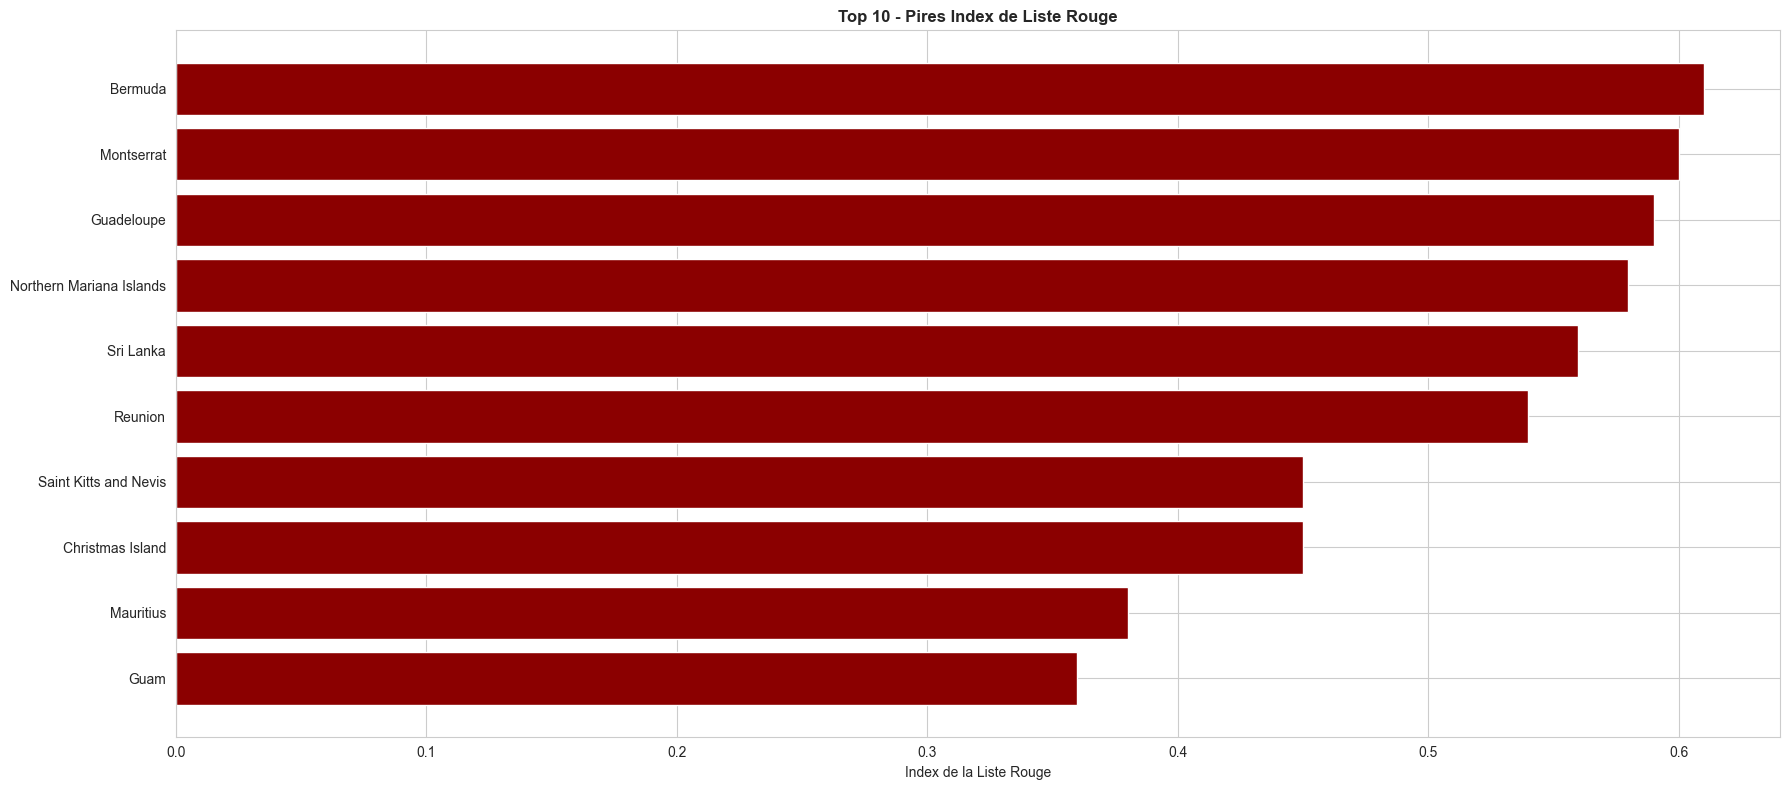

In [10]:
# 3. Top 10 et Bottom 10 des pays avec les meilleurs/pires index (année récente)
latest_year = df['Year'].max()
latest_data = df[df['Year'] == latest_year].dropna()

# Top 10 meilleurs (valeurs les plus élevées)
top_10 = latest_data.nlargest(10, '_15_5_1__er_rsk_lst')
# Bottom 10 pires (valeurs les plus faibles)
bottom_10 = latest_data.nsmallest(10, '_15_5_1__er_rsk_lst')

fig, ax1= plt.subplots(1, 1, figsize=(18, 8))

# Bottom 10
ax1.barh(range(len(bottom_10)), bottom_10['_15_5_1__er_rsk_lst'], color='darkred')
ax1.set_yticks(range(len(bottom_10)))
ax1.set_yticklabels(bottom_10['Entity'])
ax1.set_title('Top 10 - Pires Index de Liste Rouge', fontweight='bold')
ax1.set_xlabel('Index de la Liste Rouge')

plt.tight_layout()
plt.show()

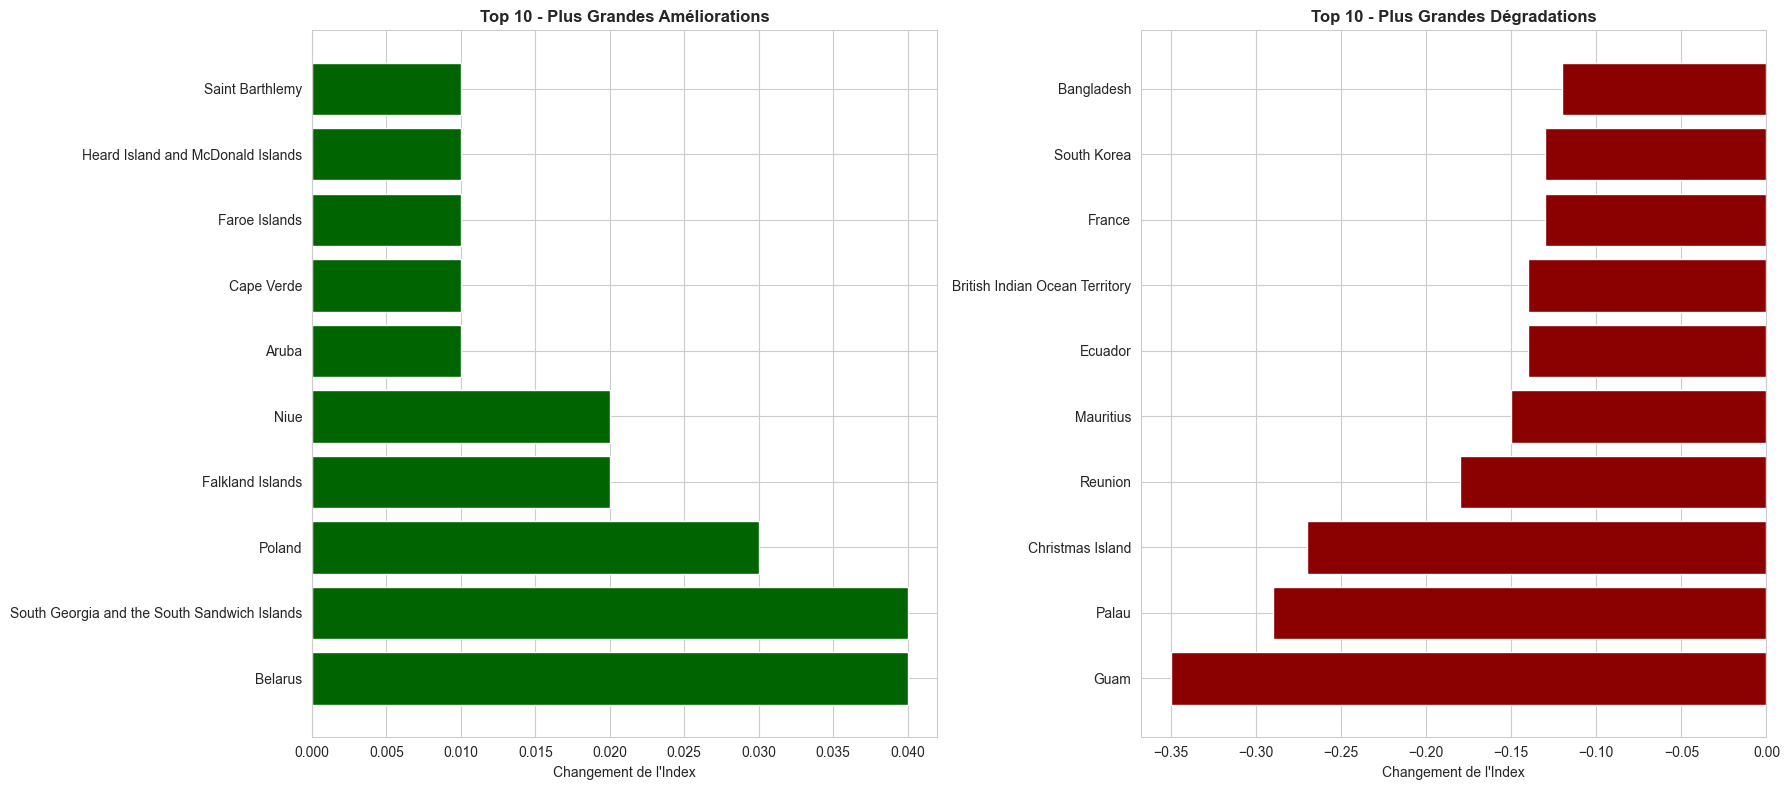

In [11]:
# 7. Analyse des tendances : pays en amélioration vs dégradation
# Calculer la tendance pour chaque pays
def calculate_trend(country_data):
    if len(country_data) < 2:
        return 0
    return country_data['_15_5_1__er_rsk_lst'].iloc[-1] - country_data['_15_5_1__er_rsk_lst'].iloc[0]

trends = []
for entity in df['Entity'].unique():
    entity_data = df[df['Entity'] == entity].sort_values('Year')
    if len(entity_data) > 1:
        trend = calculate_trend(entity_data)
        trends.append({
            'Entity': entity,
            'Trend': trend,
            'Start_Value': entity_data['_15_5_1__er_rsk_lst'].iloc[0],
            'End_Value': entity_data['_15_5_1__er_rsk_lst'].iloc[-1]
        })

trends_df = pd.DataFrame(trends)

# Top 10 améliorations et dégradations
top_improvements = trends_df.nlargest(10, 'Trend')
top_degradations = trends_df.nsmallest(10, 'Trend')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Améliorations
ax1.barh(range(len(top_improvements)), top_improvements['Trend'], color='darkgreen')
ax1.set_yticks(range(len(top_improvements)))
ax1.set_yticklabels(top_improvements['Entity'])
ax1.set_title('Top 10 - Plus Grandes Améliorations', fontweight='bold')
ax1.set_xlabel('Changement de l\'Index')

# Dégradations
ax2.barh(range(len(top_degradations)), top_degradations['Trend'], color='darkred')
ax2.set_yticks(range(len(top_degradations)))
ax2.set_yticklabels(top_degradations['Entity'])
ax2.set_title('Top 10 - Plus Grandes Dégradations', fontweight='bold')
ax2.set_xlabel('Changement de l\'Index')

plt.tight_layout()
plt.show()